In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from itertools import zip_longest
import os
import glob
import ast
import seaborn as sns
from matplotlib.colors import to_rgba

In [2]:
df = pd.read_csv("All measurements V2, cleaned/all_measurements_summery_30,000_cleaned.csv")

In [3]:
df.keys()

Index(['expected_weight', 'run_index', 'force_sensor_value', 'force_vector_1',
       'force_vector_2', 'force_vector_3', 'robot_tcp.velocity_linear_1',
       'robot_tcp.velocity_linear_2', 'robot_tcp.velocity_linear_3',
       'robot_tcp.velocity_angular_1', 'robot_tcp.velocity_angular_2',
       'robot_tcp.velocity_angular_3', 'robot_tcp.joint_angles_1',
       'robot_tcp.joint_angles_2', 'robot_tcp.joint_angles_3',
       'robot_tcp.joint_angles_4', 'robot_tcp.joint_angles_5',
       'robot_tcp.joint_angles_6', 'robot_tcp.flange_1', 'robot_tcp.flange_2',
       'robot_tcp.flange_3', 'robot_tcp.flange_4', 'robot_tcp.flange_5',
       'robot_tcp.flange_6', 'robot_tcp.flange_7'],
      dtype='object')

In [4]:
df

,expected_weight,run_index,force_sensor_value,force_vector_1,force_vector_2,force_vector_3,robot_tcp.velocity_linear_1,robot_tcp.velocity_linear_2,robot_tcp.velocity_linear_3,robot_tcp.velocity_angular_1,...,robot_tcp.joint_angles_4,robot_tcp.joint_angles_5,robot_tcp.joint_angles_6,robot_tcp.flange_1,robot_tcp.flange_2,robot_tcp.flange_3,robot_tcp.flange_4,robot_tcp.flange_5,robot_tcp.flange_6,robot_tcp.flange_7
0,0.335,1,0.340568,0.775,-0.453,20.0,0.079766,-0.010370,0.902352,0.000027,...,-2.721707,4.688728,-0.142706,-0.371705,-0.598554,0.068898,0.322016,0.946589,0.014908,-0.007314
1,0.335,1,0.340568,0.785,-0.431,20.0,0.079766,-0.010370,0.902352,0.000027,...,-2.721707,4.688728,-0.142706,-0.371705,-0.598554,0.068898,0.322016,0.946589,0.014908,-0.007314
2,0.335,1,0.341568,0.800,-0.402,20.0,0.153676,-0.044164,0.886970,-0.016157,...,-2.670519,4.689290,-0.137949,-0.371329,-0.598654,0.070673,0.322003,0.946594,0.014877,-0.007324
3,0.335,1,0.341568,0.810,-0.368,20.0,0.153676,-0.044164,0.886970,-0.016157,...,-2.670519,4.689290,-0.137949,-0.371329,-0.598654,0.070673,0.322003,0.946594,0.014877,-0.007324
4,0.335,1,0.342568,0.815,-0.338,19.0,0.156814,-0.048875,0.886929,-0.022112,...,-2.667505,4.689307,-0.137588,-0.371082,-0.598744,0.072457,0.322000,0.946595,0.014853,-0.007342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15179139,0.482,30973,0.567018,0.190,0.668,16126.0,0.226613,0.411088,0.686115,-0.018644,...,-1.369907,1.565777,4.407333,-0.530585,-0.187143,0.548930,-0.462112,0.886810,0.003469,-0.002924
15179140,0.482,30973,0.568018,0.230,0.691,16322.0,0.226613,0.411088,0.686115,-0.018644,...,-1.369907,1.565777,4.407333,-0.530585,-0.187143,0.548930,-0.462112,0.886810,0.003469,-0.002924
15179141,0.482,30973,0.570018,0.260,0.711,16660.0,0.226613,0.411088,0.686115,-0.018644,...,-1.369907,1.565777,4.407333,-0.530133,-0.186387,0.550307,-0.462154,0.886788,0.003433,-0.002924
15179142,0.482,30973,0.571018,0.284,0.736,16932.0,0.226613,0.411088,0.686115,-0.018644,...,-1.369907,1.565777,4.407333,-0.530133,-0.186387,0.550307,-0.462154,0.886788,0.003433,-0.002924


In [5]:
df = df.groupby('run_index', as_index=False).mean(numeric_only=True)

In [6]:
df

,run_index,expected_weight,force_sensor_value,force_vector_1,force_vector_2,force_vector_3,robot_tcp.velocity_linear_1,robot_tcp.velocity_linear_2,robot_tcp.velocity_linear_3,robot_tcp.velocity_angular_1,...,robot_tcp.joint_angles_4,robot_tcp.joint_angles_5,robot_tcp.joint_angles_6,robot_tcp.flange_1,robot_tcp.flange_2,robot_tcp.flange_3,robot_tcp.flange_4,robot_tcp.flange_5,robot_tcp.flange_6,robot_tcp.flange_7
0,1,0.335,0.347914,-0.286043,-0.248598,17.870183,0.366421,0.054589,0.957501,-0.046914,...,-2.248075,4.698112,-0.017268,-0.260998,-0.599612,0.314689,0.322120,0.946613,1.045429e-02,-0.006334
1,2,0.092,0.089347,0.075095,-0.013662,16.856833,-0.000090,-0.000086,0.000083,-0.000164,...,-1.713421,4.721561,-1.425530,-0.104499,-0.452661,0.539790,-0.396544,0.918015,-1.206858e-03,-0.000150
2,3,0.323,0.286799,-0.368245,0.708643,15.803245,0.446692,0.211149,1.174962,-0.055394,...,-2.062468,4.691264,-3.750887,-0.467204,-0.635581,0.372125,0.992705,-0.119190,-2.084927e-03,-0.017375
3,4,0.116,0.082121,-0.131154,0.727449,14.274390,0.702273,-0.087471,0.948077,-0.175746,...,-2.071166,4.640083,-3.754024,-0.593331,-0.617500,0.266061,0.983525,-0.167895,1.051699e-02,-0.062761
4,5,0.253,0.256462,-0.042422,0.256105,17.440404,0.129020,-0.001020,0.932028,-0.032907,...,-2.395270,4.706968,-4.112516,-0.207788,-0.557605,0.261778,0.986999,0.160469,1.759608e-03,-0.008507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30968,30969,0.097,0.067604,-0.020131,0.001588,15780.957576,-0.000005,-0.000046,-0.000047,0.000029,...,-1.313350,1.573593,2.192432,-0.484185,-0.089204,0.494229,0.999242,-0.038934,4.976625e-06,-0.000006
30969,30970,0.097,0.084540,-0.024080,-0.015210,15685.300216,-0.000046,-0.000029,0.000022,-0.000049,...,-1.415726,1.580052,1.324229,-0.468652,-0.089261,0.541659,0.919770,0.392444,-5.864047e-04,0.003258
30970,30971,0.074,0.082294,-0.027462,-0.025739,15495.560081,-0.000062,-0.000036,0.000053,-0.000059,...,-1.335272,1.573662,-1.306160,-0.474459,-0.086479,0.501104,-0.142037,0.989861,1.052893e-07,-0.000003
30971,30972,0.281,0.289912,-0.375806,0.286435,17179.008065,-0.233482,0.467417,1.013818,-0.000513,...,-0.581498,1.569952,1.277380,-0.464087,-0.472094,0.167262,0.777375,0.629037,1.825381e-04,-0.000817


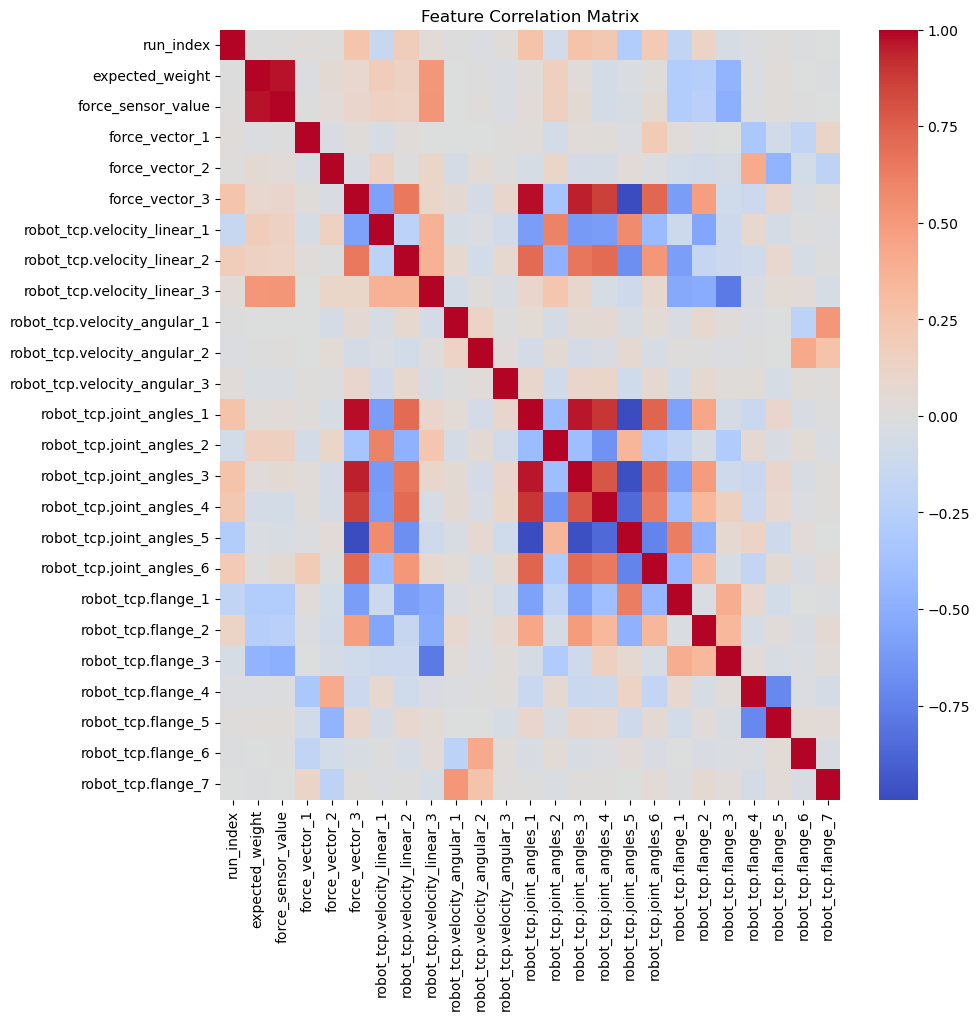

In [7]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

In [8]:
X = df.drop(columns=["expected_weight", "run_index"])
y = df["expected_weight"]

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
}

In [12]:
results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append((name, mae, r2))

In [13]:
results_df = pd.DataFrame(results, columns=["Model", "MAE", "R2"])
print(results_df.sort_values(by="MAE"))

               Model       MAE        R2
4      Random Forest  0.015687  0.976163
3      Decision Tree  0.022102  0.952327
0  Linear Regression  0.023672  0.952779
1   Ridge Regression  0.023673  0.952781
2   Lasso Regression  0.027069  0.939818


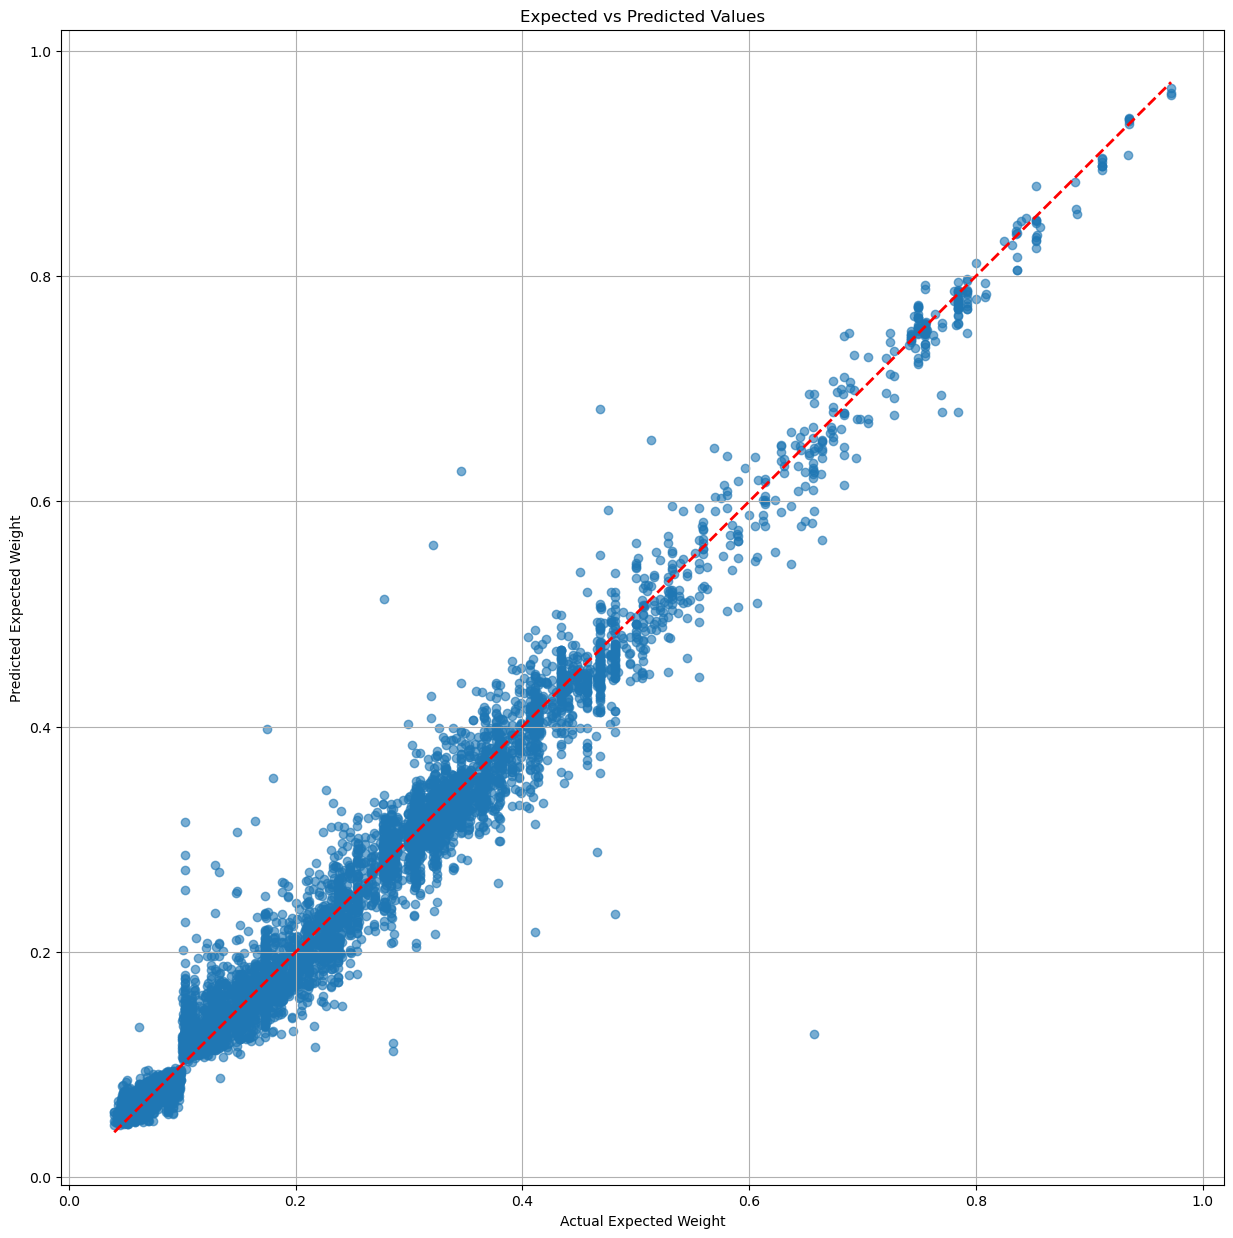

In [14]:
best_model = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
best_model.fit(X_train_scaled, y_train)
y_pred = best_model.predict(X_test_scaled)

plt.figure(figsize=(15,15))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Expected Weight")
plt.ylabel("Predicted Expected Weight")
plt.title("Expected vs Predicted Values")
plt.grid(True)
plt.show()

In [15]:
df1 = pd.read_csv("doublepicks_cleaned_rico.csv")
df1 = df1.groupby('run_index', as_index=False).mean(numeric_only=True)

df1 = df1.head(40)
# df1 = df1[df1['force_sensor_value'] >= 0.200]
# df1 = df1.drop(columns=["force_sensor_value"])

In [16]:
# df1.to_csv("Manual_measurements_grouped_mean_cleaned_structured.csv", index=False)

In [17]:
df1

,run_index,expected_weight,force_sensor_value,force_vector_1,force_vector_2,force_vector_3,robot_tcp.joint_angles_1,robot_tcp.joint_angles_2,robot_tcp.joint_angles_3,robot_tcp.joint_angles_4,...,robot_tcp.velocity_linear_1,robot_tcp.velocity_linear_2,robot_tcp.velocity_linear_3,robot_tcp.flange_1,robot_tcp.flange_2,robot_tcp.flange_3,robot_tcp.flange_4,robot_tcp.flange_5,robot_tcp.flange_6,robot_tcp.flange_7
0,1,0.165,0.376381,1.429713,-0.492840,26905.309091,-1.615214,-1.516223,-1.667944,-1.540061,...,-4.170539e-01,0.743032,0.957317,-0.198898,-0.614098,0.657333,0.973933,-0.226695,-6.343389e-03,-0.004754
1,2,0.165,0.255139,-0.215604,-0.138101,30273.241237,-2.611707,-1.493263,-1.209746,-2.009503,...,1.852462e-05,-0.000237,-0.000031,-0.597408,-0.147488,0.916696,0.973975,-0.226657,2.055966e-05,-0.000018
2,3,0.165,0.416035,0.423562,0.260935,25602.859470,-1.927920,-1.311235,-1.810885,-1.598134,...,-3.054520e-01,0.705125,0.853092,-0.335927,-0.409212,0.674897,0.946800,0.321706,-2.370375e-03,-0.005512
3,4,0.165,0.503060,-0.220365,0.015861,31865.299197,-2.622321,-1.458811,-1.246092,-2.007575,...,7.634870e-05,-0.000029,0.000136,-0.581117,-0.130954,0.913723,0.946827,0.321743,6.578198e-06,-0.000001
4,5,0.165,0.095350,0.735676,0.457267,26183.617409,-1.704043,-1.485601,-1.668122,-1.577151,...,-4.150488e-01,0.636885,0.987193,-0.244775,-0.576149,0.675240,0.993520,0.106876,2.673012e-02,-0.003411
5,6,0.165,0.235383,1.044536,-0.174847,26153.641129,-1.886779,-1.386116,-1.760990,-1.586785,...,-2.788877e-01,0.693533,0.989839,-0.333257,-0.459043,0.671776,0.989596,-0.142721,-1.248397e-02,-0.012299
6,7,0.165,0.316706,0.469163,-1.826347,29427.133065,-1.716451,-1.839390,-1.352183,-1.574964,...,-5.849184e-01,0.621612,0.782423,-0.295656,-0.785508,0.628723,-0.691080,0.722224,2.226528e-02,0.015439
7,8,0.165,0.307262,-0.300110,-0.230406,30006.335484,-2.642230,-1.553810,-1.088673,-2.072591,...,-3.017432e-06,-0.000002,-0.000007,-0.620421,-0.138940,0.949033,-0.691424,0.722445,1.732186e-03,0.001806
8,9,0.165,0.204718,0.614244,-0.679764,25449.889113,-1.938156,-1.497241,-1.616210,-1.632511,...,-2.936275e-01,0.842381,0.893024,-0.372612,-0.509188,0.694318,0.790567,-0.611739,1.508060e-02,-0.022471
9,10,0.165,0.386946,-0.765309,1.043781,30701.169734,-1.744989,-1.889473,-1.512644,-1.379655,...,-1.625362e-01,0.196604,0.564129,-0.325016,-0.802844,0.498880,0.681948,0.714966,2.162843e-02,-0.029677


In [18]:
df1.keys()

Index(['run_index', 'expected_weight', 'force_sensor_value', 'force_vector_1',
       'force_vector_2', 'force_vector_3', 'robot_tcp.joint_angles_1',
       'robot_tcp.joint_angles_2', 'robot_tcp.joint_angles_3',
       'robot_tcp.joint_angles_4', 'robot_tcp.joint_angles_5',
       'robot_tcp.joint_angles_6', 'robot_tcp.velocity_angular_1',
       'robot_tcp.velocity_angular_2', 'robot_tcp.velocity_angular_3',
       'robot_tcp.velocity_linear_1', 'robot_tcp.velocity_linear_2',
       'robot_tcp.velocity_linear_3', 'robot_tcp.flange_1',
       'robot_tcp.flange_2', 'robot_tcp.flange_3', 'robot_tcp.flange_4',
       'robot_tcp.flange_5', 'robot_tcp.flange_6', 'robot_tcp.flange_7'],
      dtype='object')

In [19]:
print("scaler expects:", getattr(scaler, "n_features_in_", "unknown"))
print("model expects:", getattr(best_model, "n_features_in_", "unknown"))
print("X_train shape:", getattr(X_train, "shape", None))

X_df1 = df1.drop(columns=["expected_weight", "run_index"], errors="ignore").reindex(columns=X_train.columns)

print("X_df1 shape:", X_df1.shape)
print("Any NaN in X_df1 after reindex? ->", X_df1.isna().any().any())

missing_created = [c for c in X_train.columns if c not in df1.columns]
print("Columns missing in df1 that reindex created:", missing_created[:20], "… total:", len(missing_created))

scaler expects: 23
model expects: 23
X_train shape: (23229, 23)
X_df1 shape: (36, 23)
Any NaN in X_df1 after reindex? -> False
Columns missing in df1 that reindex created: [] … total: 0


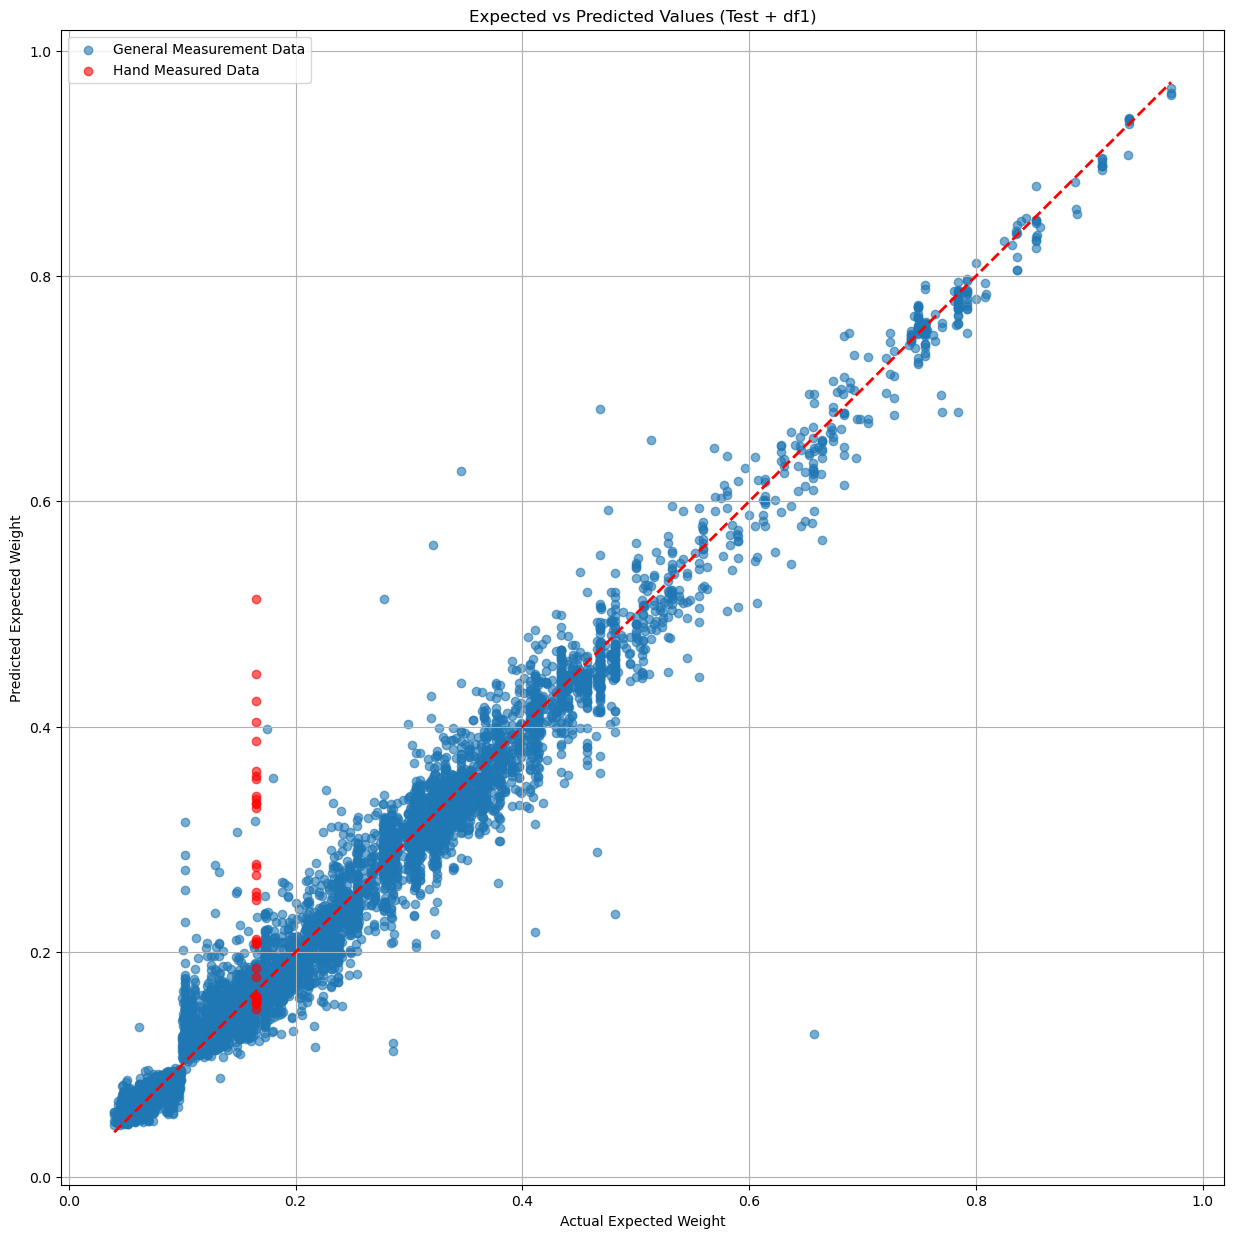

In [20]:
# plot of the data (the full time series as input) with the hand measured values.

X_df1 = df1.drop(columns=["expected_weight", "run_index"]).reindex(columns=X_train.columns)
X_df1_scaled = scaler.transform(X_df1)
y_pred_df1 = best_model.predict(X_df1_scaled)

plt.figure(figsize=(15, 15))
plt.scatter(y_test, y_pred, alpha=0.6, label="General Measurement Data")
plt.scatter(df1["expected_weight"], y_pred_df1, alpha=0.6, color="red", label="Hand Measured Data")

lo = min(y_test.min(), df1["expected_weight"].min())
hi = max(y_test.max(), df1["expected_weight"].max())
plt.plot([lo, hi], [lo, hi], 'r--', linewidth=2)

plt.xlabel("Actual Expected Weight")
plt.ylabel("Predicted Expected Weight")
plt.title("Expected vs Predicted Values (Test + df1)")
plt.legend()
plt.grid(True)
plt.show()

In [21]:
import joblib

# Save the model
joblib.dump(best_model, "best_model_with_expected_weight.pkl")
joblib.dump(scaler, "scaler_with_expected_weight.pkl")

['scaler_with_expected_weight.pkl']